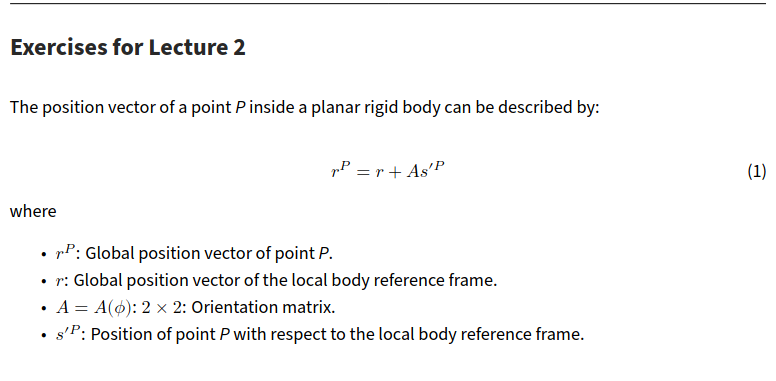

In [ ]:
import numpy as np
import numpy.typing as npt

def global_transformation_2D(translation_vector: npt.ArrayLike, rotational_angle, local_point: npt.ArrayLike) -> np.ndarray:
    orientation_matrix = np.squeeze(np.array([[np.cos(rotational_angle), -np.sin(rotational_angle)], [np.sin(rotational_angle), np.cos(rotational_angle)]]))
    local_point = np.atleast_1d(local_point)
    
    global_vector = translation_vector + orientation_matrix @ local_point
    
    return global_vector



'\ntrans = np.array([1, 1])\nangle = np.array([np.pi/2])\nlocal = np.array([1, 1])\nprint(np.round(global_transformation_2D(trans, angle, local)))\n'

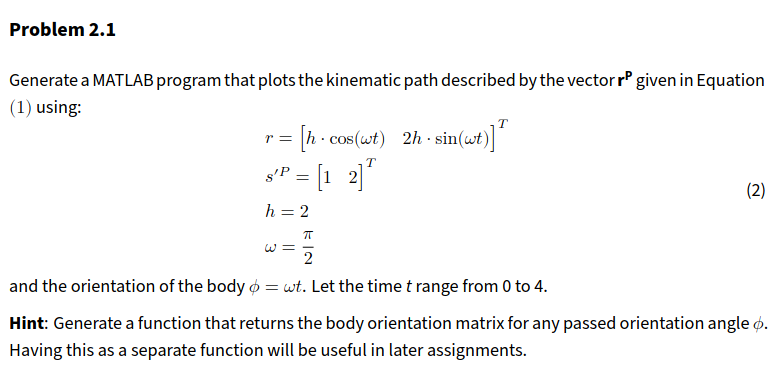

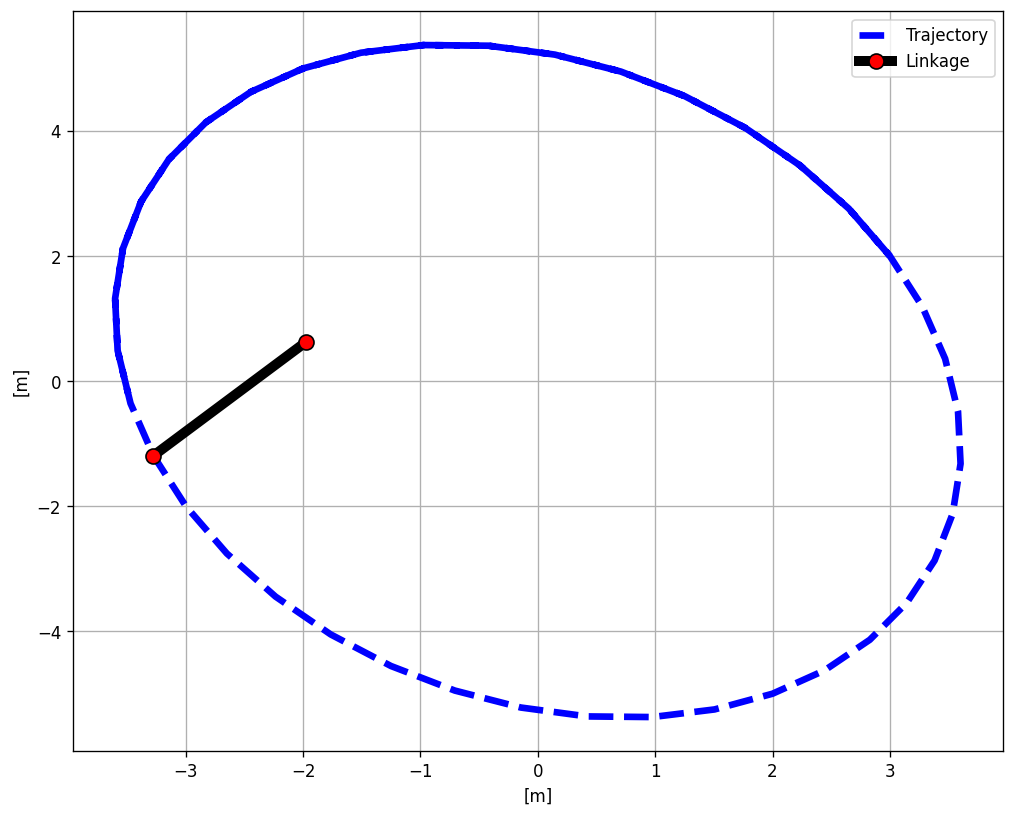

In [71]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

h = 2
omega = np.pi/2
s_p = np.array([1, 2]).T

end_time = 3 #In seconds
timestep = 0.1 #Timestep in seconds
time_vector = np.arange(0, end_time*(np.pi/omega), timestep)
time_period = 1/timestep

body_orientation = time_vector*omega
translation_array = np.array([h*np.cos(body_orientation), 2*h*np.sin(body_orientation)]).T

kinematic_path_points = np.empty((len(time_vector), 2))

for index, timepoints in enumerate(time_vector):
    kinematic_path_points[index] = global_transformation_2D(translation_array[index, :], body_orientation[index], s_p)


#DATA SECTION
axis_offset = 1.1
x_data = kinematic_path_points[:,0]
y_data = kinematic_path_points[:,1]
trans_x = translation_array[:,0]
trans_y = translation_array[:,1]

#Find max values on axis and add percentage offset
max_x = np.max(x_data)
max_y = np.max(y_data)
#Initiating the animation
fig, ax = plt.subplots(figsize=(10, 8), dpi=120)

#Add lines for trajectory and for linkage/body
lineplot_trajectory = ax.plot(x_data[0], y_data[0], label="Trajectory of body", linestyle="dashed", color="blue", linewidth=4, animated = True)[0]
lineplot_linkage = ax.plot(trans_x[0], y_data[0], label="Trajectory of body",
                           linestyle="solid", color="black", linewidth=6,
                           marker="o", markersize=9, markerfacecolor="red",
                           animated = True)[0]

#Axis units
x_unit = "[m]"
y_unit = "[m]"

#Setting plot markers and legends
ax.legend(["Trajectory", "Linkage"])
ax.grid()
ax.set_xlim(-max_x*axis_offset, max_x*axis_offset)
ax.set_ylim(-max_y*axis_offset, max_y*axis_offset)
ax.set_xlabel(x_unit)
ax.set_ylabel(y_unit)

def frame_update(timepoint):
    
    x_traj = x_data[:timepoint]
    y_traj = y_data[:timepoint]
    x_link = [trans_x[timepoint], x_data[timepoint]]
    y_link = [trans_y[timepoint], y_data[timepoint]]
    
    lineplot_trajectory.set_xdata(x_traj)
    lineplot_trajectory.set_ydata(y_traj)
    lineplot_linkage.set_xdata(x_link)
    lineplot_linkage.set_ydata(y_link)

    return (lineplot_trajectory, lineplot_linkage)

#Animation call here
animation = FuncAnimation(fig, frame_update, frames=range(len(time_vector)), blit=True, interval=time_period)
animation.save("saved_animation.gif")
HTML(animation.to_jshtml(fps=time_period))

